### CNN visualization
1. CNN를 시각화하는 방법론
2. 모델 자체의 행위 특성을 분석하기 위한 시각화
3. 입력 데이터에 따른 모델의 결정을 해석하기 위한 시각화


### CNN is black box
학습을 통해 convolution filter들이 무엇을 배우는 것일까?
CNN을 학습할 때, 학습이 잘 안되는 경우는 무슨 이유일까?... 등의 궁금증이 생긴다.
  
하지만 CNN은 block box이기 때문에 해석이 안 된다. 그나마 visualization을 통해서 black box를 가늠해보고 어떤 것을 알아볼 수 있는지 확인해보자.

### ZFNet
- 낮은 계층 (low level)에는 방향성이 있는 선을 찾는 필터
- 높은 계층 (high level)에는 점점 의미가 있는 표현을 학습하게 된다.

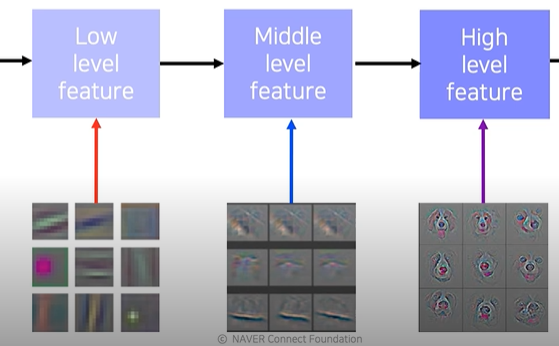

---
## Model Decision Explanation

- 모델이 특정 입력을 받았을 때,
- 그 입력의 어느 부분을 보고 있는지 확인 할 수 있다.

## Saliency test 계열
- 영상이 주어졌을 때, 영상이 제대로 판정되기 위한 각 영역의 중요도를 추출하는 방법

### 1. Occlusion Map
- occlusion map으로 입력 영상을 가린다.
- 어떤 위치를 map으로 가리느냐에 따라 score가 바뀌게 된다.
- 원하는 물체의 중요 부분을 map으로 가리면 score가 많이 떨어지게 된다.
- salient parts(중요부분)을 히트맵으로 볼 수 있게 된다.

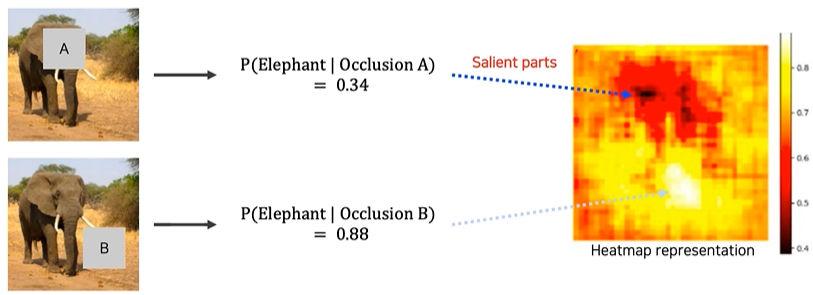

### 2. Backpropagation을 이용
- 특정 이미지를 classification 해보고, 최종 결론이 나온 class에 결정적인 영향을 미친 부분이 어딘지를 heatmap으로 표현하고자 함
- 히트맵의 밝은 부분들이 중요 부분이 된다.

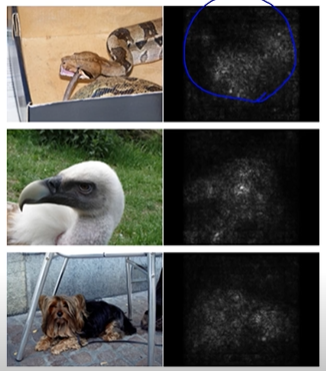

1. 입력 영상을 넣고 하나의 class score를 얻는다.
2. 역전파를 입력 도메인까지 진행한다.
3. 이렇게 얻어진 gradient에 절댓값을 취하고 이미지 형태로 출력함.(또는 제곱을 한다, gradient의 절대적인 크기를 알기 위해서이다.)
    - gradient 크다는 것은 입력에서 많이 바뀌는 부분이고 거기로 인해 score가 많이 바뀌는 부분이라는 의미이다.
    

4. 위 과정을 한번만 해도 좋고, 반복을 해도 좋다.

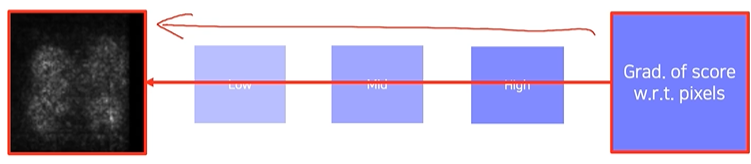

---
## CAM 계열 (Class Activation Map)
- 어디를 참조해서 결과를 냈는지, 보기 좋은 heatmap을 보여줌.
- bounding box에도 사용이 가능함


### CAM 구조
- 뉴럴 네트워크의 일부를 개조해야 한다.
- 마지막 conv feature map을 `GAP`을 통과시켜야 한다.
- 그 후에 FC layer를 한번만 통과시켜서 classification을 한다.


- 문제점은, CAM을 적용하려니까 마지막 layer 구성이 GAP과 FC layer로 바뀌고 재학습을 해야한다는 점이다.
- 그러다보니, 성능이 바뀌게 되는 경우가 생긴다.

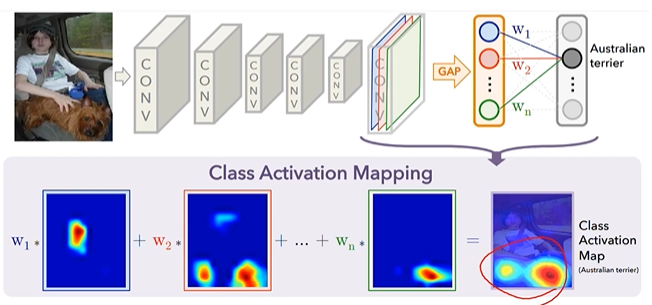

### Grad-CAM
- 구조를 변경하지 않고, 재학습도 필요없이 CAM를 뽑기위한 방법이 생김.
- backbone이 CNN이기만 하면 사용할 수 있게 됨.

#### 핵심
- CAM이라는 것은 CNN의 마지막 conv feature map을 weight들과 weighted sum을 하는 것이다.
- 현재, 결합할 weights을 모르기 때문에 이를 구하는 것이 핵심이다.

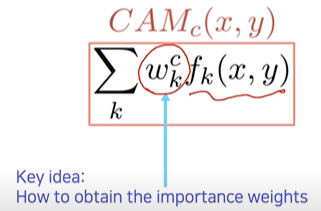

#### Alpha 구하기
- 우리가 관심을 갖는 activation map 까지 역전파를 진행해서 backprop gradient를 구한다.
- 그 다음, 공간축으로 GAP를 적용해서, 각 채널에 gradient 성분의 크기를 구한다.
- 이것을 activation map을 결합하기 위한 weight로 사용하게 된다.

#### 최종 Grad-CAM
- 최종적으로 구한 alpha와 activation map을 선형결합을 하고,
- 마지막에 ReLU을 적용해서 양수만 사용하도록 한다.

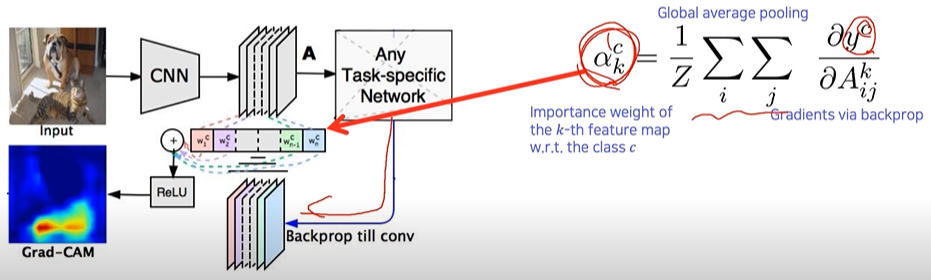